# **Actividad 10**

In [6]:
#Importamos bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

**Ejercicio 1:**
<br>
<br>Resuelva la ecuación de calor, usando el método anterior para el siguiente caso

**Caso a)**
<br>
<br>Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=100$. Condición inicial (temperatura dentro de la barra): $u(x,0)=0$.
<br>
<br>Condiciones a la frontera: $u(0,t)=10, u(L,t)=0$
<br>
<br>Realice los cálculos hasta alcanzar el equilibrio térmico.

dt/dx^2 < 0.5? 0.004
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'lw'


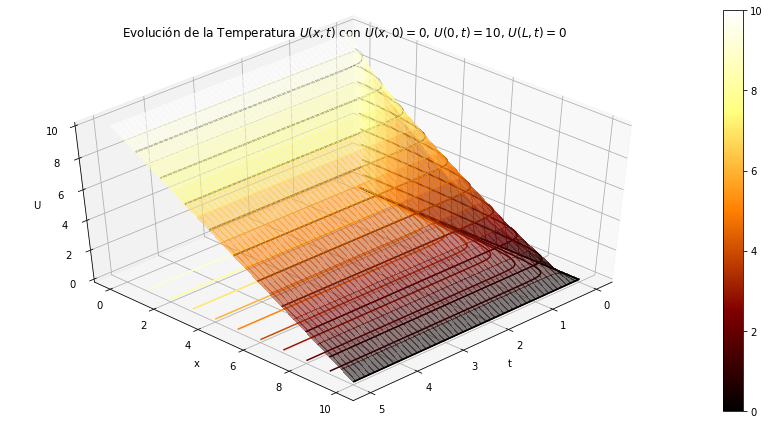

In [7]:
#Resolvermos el inciso (a)

nX = 21   # Número de puntos en el eje x
nT = 5001 # Número de puntos en el tiempo

x0 = 0
L = 10 # Longitud de la barra

t0 = 0
tF = 5 # Tiempo final

dx = (L - x0)/(nX - 1) # tamaño discretización en x
dt = (tF - t0)/(nT - 1) # tamaño de la dicretización en t
print("dt/dx^2 < 0.5?", dt/dx**2)
print(" ")

kappa = 100.0      # difusividad térmica
alpha = kappa*dt/dx**2 # Coeficiente en la Ecuación

xStep = np.linspace(x0, L, nX) # Malla (x,t) 
tStep = np.linspace(t0, tF, nT)

U = np.zeros((nX, nT)) # Tamaño de la matrix la solución y la inicia con ceros

U[:,0] = 0 # Función de Temperatura interior del Tubo

U[0, :] = 10  # Condiciones a la Frontera tipo Dirichlet
U[-1, :] = 0

# Método de diferencias finitas Ec. del Calor

for j in range(0, nT - 1): # Avance en el tiempo
    for i in range(1, nX - 1): # Calcula la Temp sobre todo el dominio en x
        U[i, j+1] = alpha*U[i - 1, j] + (1 - 2*alpha)*U[i, j] + alpha*U[i + 1, j]


T, X = np.meshgrid( tStep, xStep ) # Define malla para graficar
fig = plt.figure(figsize=(12, 6))

ax = fig.gca(projection = "3d") # Grafica una superficie
surf = ax.plot_surface(T, X, U, cmap = "afmhot", linewidth = 0.01, antialiased = False, alpha = 0.5)

# Contornos
ax.contour(T, X, U, 10, lw = 1, colors = "k", linestyles = "solid")
ax.contour(T, X, U, 10, lw = 1, cmap = "afmhot", linestyles = "solid", offset = 0)

# Grafica una tabla de valores 
m = cm.ScalarMappable( cmap = "afmhot" )
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel("t")
ax.set_ylabel("x")
ax.set_zlabel("U")
ax.set_title( "Evolución de la Temperatura $U(x,t)$ con $U(x,0)=0$, $U(0,t)=10$, $U(L,t)=0$" )

ax.view_init( elev = 45, azim = 45 ) # Punto del observador 

plt.tight_layout()
plt.show()

**Caso b)**
<br>
<br>Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$.
<br>
<br>Condición inicial $u(x,0)=20$.
<br>
<br>Condiciones a la frontera: $u(0,t)=(20+10sin(\frac{\pi t}{12})), u(L,t)=20$
<br>
<br>Realice los cálculos para $t=(0,48)$
<br>
<br>Pueden ajustarse parámetros para ver cómo cambia la temperatura dentro del cuerpo.

dt/dx**2 < 0.5? 0.011552000000000002
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: The following kwargs were not used by contour: 'lw'


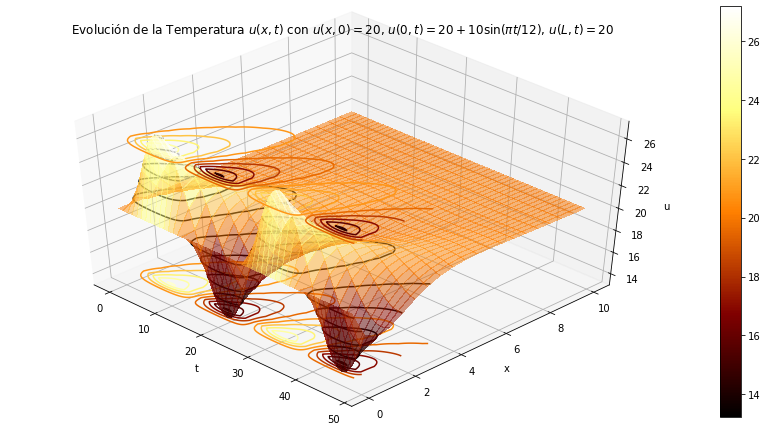

In [13]:
#Resolviendo el inciso (b)

nX = 20    # Número de puntos en el eje x
nT  = 15001 # Número de puntos en el tiempo

x0 = 0
L = 10 # Longitud de la barra

t0 = 0
tF = 48 # Tiempo final

dx = (L - x0)/(nX - 1) # tamaño discretización en x
dt = (tF - t0)/(nT - 1) # tamaño de la dicretización en t
print( "dt/dx**2 < 0.5?", dt/dx**2)
print( " " )

kappa = 0.25 # difusividad térmica

alpha = kappa*dt/dx**2 # Coeficiente en la Ecuación

xStep = np.linspace(x0, L, nX) # Malla (x,t) 
tStep = np.linspace(t0, tF, nT)

U = np.zeros((nX, nT)) # Tamaño de la matrix la solución y la inicia con ceros

# La temperatura inicial es de 20ºC dentro de la barra
U[:,0] = 20.0 

# Método de diferencias finitas Ec. del Calor
for j in range(0, nT-1): # Avance en el tiempo
    t = j*dt
    U[0, :] = 20 + 10*np.sin(np.pi*t/12.0) # Condiciones a la frontera (varía con el tiempo) 
    U[-1, :] = 20.0
    for i in range(1, nX - 1): # Calcula la Temp sobre todo el dominio en x
        U[i, j + 1] = alpha*U[i - 1, j] + (1 - 2*alpha)*U[i, j] + alpha*U[i + 1, j]

T, X = np.meshgrid(tStep, xStep) # Define malla para graficar
fig = plt.figure(figsize = (12, 6))


ax = fig.gca(projection = "3d") # Grafica una superficie
surf = ax.plot_surface(T, X, U, cmap = "afmhot", linewidth = 0.01, antialiased = False, alpha = 0.5)

# Contornos
ax.contour(T, X, U, 10, lw = 1, colors = "k", linestyles = "solid")
ax.contour( T, X, U, 10, lw = 1, cmap = "afmhot", linestyles = "solid", offset = 14)
ax.contour( T, X, U, 10, lw = 1, cmap = "afmhot", linestyles = "solid", offset = 26)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap = "afmhot")
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel("t")
ax.set_ylabel("x")
ax.set_zlabel("u")
ax.set_title("Evolución de la Temperatura $u(x,t)$ con $u(x,0)=20$, $u(0,t)=20+10\sin(\pi t/12)$, $u(L,t)=20$")

ax.view_init(elev = 45, azim = -45) # Punto del observador 

plt.tight_layout()
plt.show()


**Ejercicio 2**
<br>
<br> **Variaciones de la temperatura en el suelo**
<br>
<br>La superficie de la Tierra recibe radiación solar durante el día. Esta energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera.
<br>
<br>Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje $x$ la dirección hacia dentro del suelo.
<br>
<br>A cierta profundidad $x=L$, suponemos que la temperatura ya no cambia, es decir $\frac{\partial u}{\partial x}=0$ (Condición de Neumann).
<br>
<br>Supondremos que la variación de la temperatura en la superficie terrestre varía como
<center>$u(0,t)=u_0+u_asin(\frac{2\pi t}{P})$</center>



<br>donde $u_0$ es la inicial temperatura promedio del suelo y $u_a$ es la temperatura del aire. La constante $P$ es el periodo de variación diaria de temperatura $P=24h=86,400s$.
<br>
<br>En este caso la constante de difusión de calor es $\kappa = 1.0 \times 10^{-6}$. El tiempo será medido en segundos.
<br>
<br>Usando la ecuación de Calor, determina numéricamente la variación del perfil de temperatura dentro del suelo, por ejemplo, para Hermosillo en estos días supongamos que $u_0=15ºC, u_a=20ºC$
<br>
<br>Realiza una simulación de al menos 48 horas.

dt/dx^2 < 0.5? 276.5952
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: The following kwargs were not used by contour: 'lw'


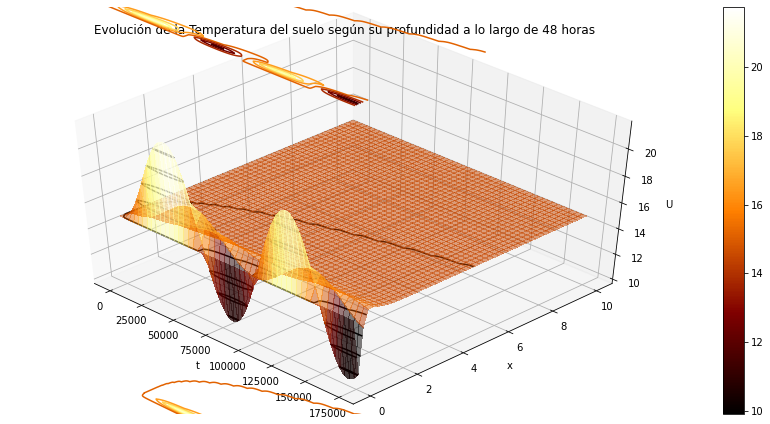

In [20]:
#Resolviendo el problema 2

nX = 50   # Número de puntos en el eje x
nT = 15001 # Número de puntos en el tiempo (Cantidad de segundos en un día)

x0 = 0 # Superficie del suelo
L = 10 # Profundidad del suelo

t0 = 0     # Tienpo inicial
P = 86400
tF = P*2 # Tiempo final (48 horas)

dx = (L - x0)/(nX - 1) # tamaño discretización en x
dt = (tF - t0)/(nT - 1) # tamaño de la dicretización en t
print( "dt/dx^2 < 0.5?", dt/dx**2)
print( " " )

kappa = 1e-6 # difusividad térmica

alpha = kappa*dt/dx**2 # Coeficiente en la Ecuación

xSteps = np.linspace(x0, L, nX) # Malla (x,t) 
tSteps = np.linspace(t0, tF, nT)


U = np.zeros((nX, nT)) # Tamaño de la matrix de la solución e inicia con ceros

U[:,0] = 15*np.ones(xSteps.shape) # La temperatura inicial es de 20ºC dentro de la tierra

# Método de diferencias finitas Ec. del Calor

for j in range(0, nT - 1): # Avance en el tiempo
    # Condiciones a la frontera (varía con el tiempo) 
    t = j*dt
    U[0, :] = 15 + 20.0*np.sin(2*np.pi*t/P)
    U[-1, :] = 15
    for i in range(1, nX - 1): # Calcula la Temp sobre todo el dominio en x
        U[i, j+1] = alpha*U[i - 1, j] + (1 - 2*alpha)*U[i, j] + alpha*U[i + 1, j]

# Define malla para graficar
T, X = np.meshgrid( tSteps, xSteps )
fig = plt.figure( figsize = ( 12, 6 ) )

# Grafica una superficie
ax = fig.gca(projection = "3d")
surf = ax.plot_surface(T, X, U, cmap = "afmhot",
                       linewidth = 0.01, antialiased = False, alpha = 0.5)
# Contornos
ax.contour(T, X, U, 10, lw = 1, colors = "k", linestyles = "solid") 
ax.contour(T, X, U, 10, lw = 1, cmap = "afmhot", linestyles = "solid", offset = 0)
ax.contour(T, X, U, 10, lw = 1, cmap = "afmhot", linestyles = "solid", offset = 30)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap = "afmhot")
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel("t")
ax.set_ylabel("x")
ax.set_zlabel("U")
ax.set_title("Evolución de la Temperatura del suelo según su profundidad a lo largo de 48 horas")

ax.view_init(elev = 45, azim = -45) # Punto del observador 

plt.tight_layout()
plt.show()